In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

In [18]:
building = pd.read_csv("../../dataset/building_metadata.csv.gz")
print(building.head())

   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-01 01:00:00             24.4             NaN   
2        0  2016-01-01 02:00:00             22.8             2.0   
3        0  2016-01-01 03:00:00             21.1             2.0   
4        0  2016-01-01 04:00:00             20.0             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   
1             21.1               -1.0              1020.2            70.0   
2             21.1                0.0              1020.2             0.0   
3             20.6                0.0              1020.1             0.0   
4             20.0               -1.0              1020.0           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6  


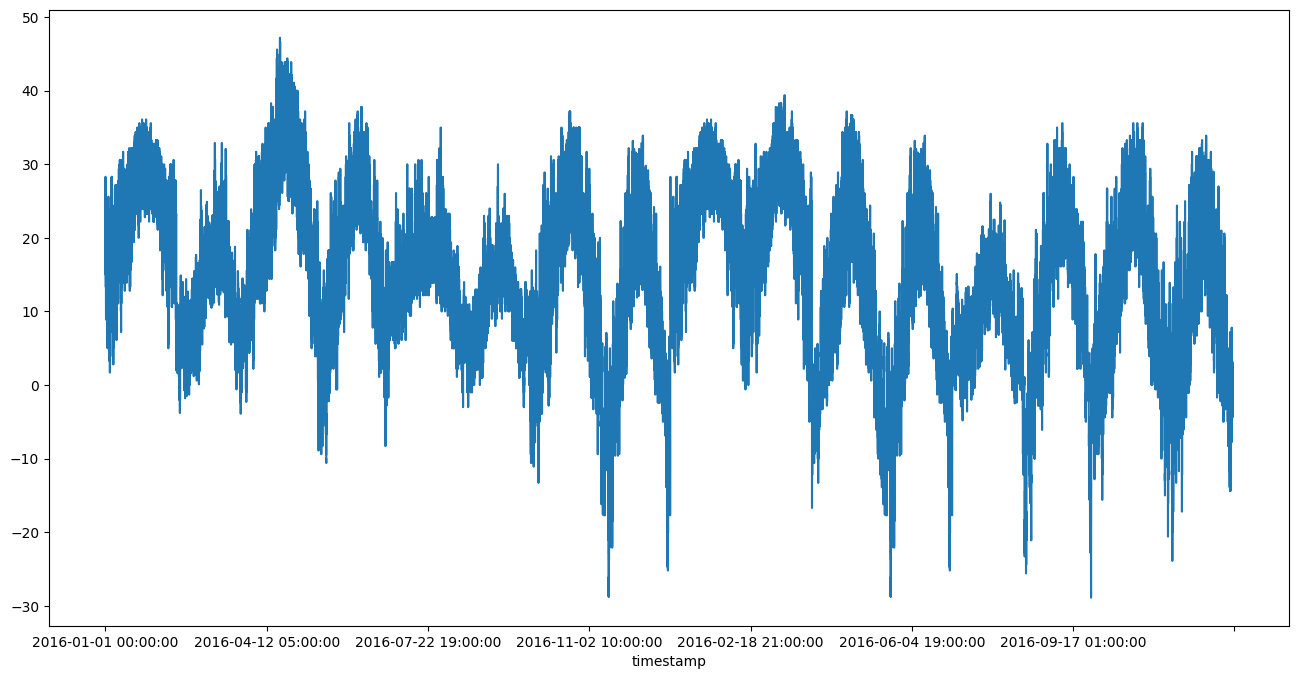

In [19]:
weather = pd.read_csv("../../dataset/weather_train.csv.gz")
print(weather.head())
weather.set_index("timestamp")["air_temperature"].plot()
plt.show()

      building_id  meter            timestamp  meter_reading
0               0      0  2016-01-01 00:00:00          0.000
1               0      0  2016-01-01 01:00:00          0.000
2               0      0  2016-01-01 02:00:00          0.000
3               0      0  2016-01-01 03:00:00          0.000
4               0      0  2016-01-01 04:00:00          0.000
...           ...    ...                  ...            ...
8779            0      0  2016-12-31 19:00:00        232.071
8780            0      0  2016-12-31 20:00:00        189.069
8781            0      0  2016-12-31 21:00:00        169.958
8782            0      0  2016-12-31 22:00:00        169.958
8783            0      0  2016-12-31 23:00:00        175.418

[8784 rows x 4 columns]


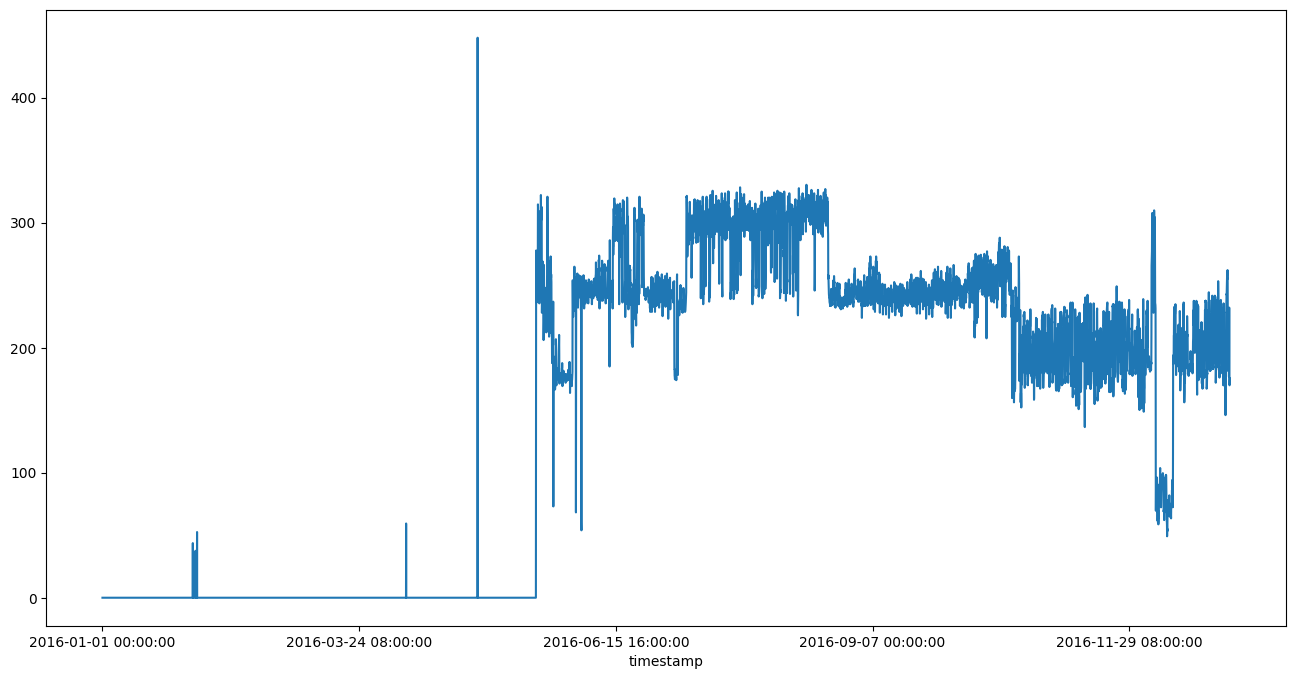

In [20]:
energy_0 = pd.read_csv("../../dataset/train.0.0.csv.gz")
print(energy_0)
energy_0.set_index("timestamp")["meter_reading"].plot()
plt.show()

In [21]:
energy_0 = pd.merge(left=energy_0, right=building, how='left', left_on="building_id", right_on="building_id")
print(energy_0.head())

   building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            0      0  2016-01-01 01:00:00            0.0        0   
2            0      0  2016-01-01 02:00:00            0.0        0   
3            0      0  2016-01-01 03:00:00            0.0        0   
4            0      0  2016-01-01 04:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  
0   Education         7432      2008.0          NaN  
1   Education         7432      2008.0          NaN  
2   Education         7432      2008.0          NaN  
3   Education         7432      2008.0          NaN  
4   Education         7432      2008.0          NaN  


In [22]:
energy_0.set_index(['timestamp', 'site_id'], inplace=True)
weather.set_index(['timestamp', 'site_id'], inplace=True)

In [23]:
energy_0 = pd.merge(left=energy_0, right=weather, how='left', left_index=True, right_index=True)
energy_0.reset_index(inplace=True)
print(energy_0)

                timestamp  site_id  building_id  meter  meter_reading  \
0     2016-01-01 00:00:00        0            0      0          0.000   
1     2016-01-01 01:00:00        0            0      0          0.000   
2     2016-01-01 02:00:00        0            0      0          0.000   
3     2016-01-01 03:00:00        0            0      0          0.000   
4     2016-01-01 04:00:00        0            0      0          0.000   
...                   ...      ...          ...    ...            ...   
8779  2016-12-31 19:00:00        0            0      0        232.071   
8780  2016-12-31 20:00:00        0            0      0        189.069   
8781  2016-12-31 21:00:00        0            0      0        169.958   
8782  2016-12-31 22:00:00        0            0      0        169.958   
8783  2016-12-31 23:00:00        0            0      0        175.418   

     primary_use  square_feet  year_built  floor_count  air_temperature  \
0      Education         7432      2008.0       

In [24]:
for column in energy_0.columns:
    energy_nulls = energy_0[column].isnull().sum()
    if energy_nulls > 0:
        print(f'{column} : {str(energy_nulls)}')
print(energy_0[energy_0['precip_depth_1_hr'].isnull()])

floor_count : 8784
air_temperature : 3
cloud_coverage : 3830
dew_temperature : 3
precip_depth_1_hr : 1
sea_level_pressure : 85
wind_direction : 250
             timestamp  site_id  building_id  meter  meter_reading  \
0  2016-01-01 00:00:00        0            0      0            0.0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              1019.7   

   wind_direction  wind_speed  
0             0.0         0.0  


In [25]:
energy_0['air_temperature'].fillna(0, inplace=True)
energy_0['cloud_coverage'].fillna(0, inplace=True)
energy_0['dew_temperature'].fillna(0, inplace=True)
energy_0['precip_depth_1_hr'] = energy_0['precip_depth_1_hr'].apply(lambda x:x if x > 0 else 0)
energy_0_sea_level_pressure_mean = energy_0["sea_level_pressure"].mean()
energy_0["sea_level_pressure"] = energy_0["sea_level_pressure"].apply(lambda x:energy_0_sea_level_pressure_mean if x!=x else x)
energy_0_wind_direction_mean = energy_0['wind_direction'].mean()
energy_0['wind_direction'] = energy_0['wind_direction'].apply(lambda x:energy_0_wind_direction_mean if x!=x else x)
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           8784 non-null   object 
 1   site_id             8784 non-null   int64  
 2   building_id         8784 non-null   int64  
 3   meter               8784 non-null   int64  
 4   meter_reading       8784 non-null   float64
 5   primary_use         8784 non-null   object 
 6   square_feet         8784 non-null   int64  
 7   year_built          8784 non-null   float64
 8   floor_count         0 non-null      float64
 9   air_temperature     8784 non-null   float64
 10  cloud_coverage      8784 non-null   float64
 11  dew_temperature     8784 non-null   float64
 12  precip_depth_1_hr   8784 non-null   float64
 13  sea_level_pressure  8784 non-null   float64
 14  wind_direction      8784 non-null   float64
 15  wind_speed          8784 non-null   float64
dtypes: flo

C:\Users\VOVCHEK\AppData\Local\Temp\ipykernel_25544\92370716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_0['air_temperature'].fillna(0, inplace=True)
C:\Users\VOVCHEK\AppData\Local\Temp\ipykernel_25544\92370716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 